In [42]:
#импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import scipy
from scipy import stats
from scipy.stats import levene
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import math
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
import bioinfokit
from bioinfokit.analys import stat

In [44]:
#импорт данных
df = pd.read_excel('variant_40.xlsx', sheet_name='v40_4')
df = pd.DataFrame(df)
df.head(5)

,Group,Time,Value
0,A,3,-14.40
1,A,3,-12.15
2,A,3,-13.30
3,A,6,-19.56
4,A,6,-16.91


In [45]:
X_a = df['Value'][df['Group'] == 'A'].tolist()
X_b = df['Value'][df['Group'] == 'B'].tolist()
X_c = df['Value'][df['Group'] == 'C'].tolist()
y = df['Time'][df['Group'] == 'C'].tolist()

In [46]:
df_full = pd.DataFrame(
    {'A': X_a,
     'B': X_b,
     'C': X_c,
     'Time': y
    })

In [47]:
model = smf.ols('Time ~ A + B + C', data=df_full)
#Обучаем модель
res = model.fit()
#Вывод статистических данных
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6348.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.35e-37
Time:                        22:05:07   Log-Likelihood:                -8.2126
No. Observations:                  30   AIC:                             24.43
Df Residuals:                      26   BIC:                             30.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8289      0.193    -25.010      0.000      -5.226      -4.432
A             -0.1527      0.060     -2.565      0.016      -0.275      -0.030
B             -0.2276      0.046     -4.900      0.000      -0.323      -0.132
C             -0.2270      0.059     -3.826      0.001      -0.349      -0.105
==============================================================================
Omnibus:                        5.246   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.788
Skew:                           0.840   Prob(JB):                        0.151
Kurtosis:                       3.453   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Представленному протоколу выше, мы можем доверять только в том случае, если выполнени предпосылки, а именно: 
##### Мультиколлинеарность
##### o	Автокореллированность



## Проверка предпосылок модели
#### Мультиколлинеарность

In [48]:
df_full[['A','B', 'C']].corr()

,A,B,C
A,1.000000,0.995028,0.996751
B,0.995028,1.000000,0.994481
C,0.996751,0.994481,1.000000


###### Между переменными нет высокой корреляции. Значит, у нас получилосm корректно оценить нашу модель. В случае, если бы у нас была явная мультиколлинеарность, python  в явном виде написал  Na в строках.

#### Автокоррелированность
##### Для проверки этой предпосылки, нам достаточно посмотреть в протокол оценивания и найти строку Durbin - Watson. Эта статистика Дарбина - Уотсона. Если она оказывается  от о до 4, то автокоррелированности в остатках нет. В нашем протоколе = 2,189, соответсвтвенно, автокоррелиованности в остатках нет.

#### Проверка остатков на гетероскедастичность

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


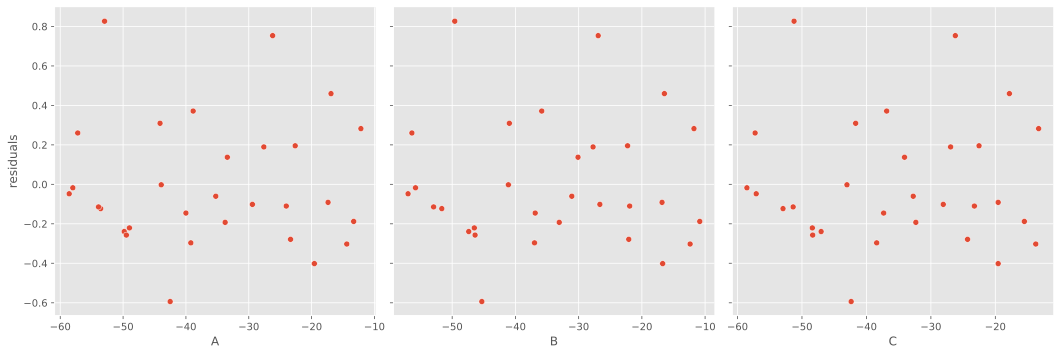

In [52]:
df_full['residuals'] = res.resid

sns.pairplot(
    df_full,
    y_vars = 'residuals',
    x_vars = ['A', 'B', 'C'],
    size = 5,
    diag_kind=None
);

##### Все отклонения находятся внутри полуполосы постоянной ширины, параллельной оси абсцисс. Это говорит о независимости дисперсий от значений переменной Х и их постоянстве, т.е. в этом случае выполняются условия гомоскедастичности.

# Тест Бройша-Пагана
##### Данный тест используется для проверки наличия гетероскедастичности слeчайных ошибок регрессионной модели

In [49]:
het_breuschpagan(res.resid, df_full[['A', 'B', 'C']].values)

(8.412244155432617,
 0.0149040531770682,
 3.5070897569904766,
 0.028731646032586686)

### Построение графика линейной множественной регрессии

In [7]:
X_a = df[['Time']][df['Group'] == 'A'].values
X_b = df[['Time']][df['Group'] == 'B'].values
X_c = df[['Time']][df['Group'] == 'C'].values
y_a = df['Value'][df['Group'] == 'A'].values
y_b = df['Value'][df['Group'] == 'B'].values
y_c = df['Value'][df['Group'] == 'C'].values

In [8]:
lr_a = LinearRegression()
lr_b = LinearRegression()
lr_c = LinearRegression()

In [9]:
lr_a.fit(X_a, y_a)
lr_b.fit(X_b, y_b)
lr_c.fit(X_c, y_c)

LinearRegression()

In [10]:
lr_a_pred = lr_a.predict(X_a)
lr_b_pred = lr_b.predict(X_b)
lr_c_pred = lr_c.predict(X_c)

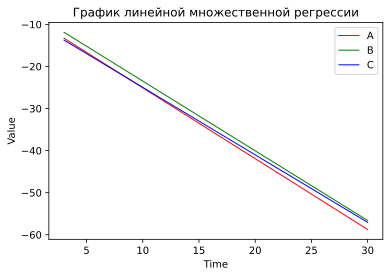

In [11]:
#Визуализация графика линейной множественной регрессии
plt.plot(y, lr_a_pred, color='red', linewidth=1, label = 'А')
plt.plot(y, lr_b_pred, color='green', linewidth=1, label = 'B')
plt.plot(y, lr_c_pred, color='blue', linewidth=1, label = 'C')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('График линейной множественной регрессии')
plt.legend()
plt.show()

### Сравнение групп

In [12]:
#Создание df без учета времени
df_not = df[['Group', 'Value']]
df_not

,Group,Value
0,A,-14.40
1,A,-12.15
2,A,-13.30
3,A,-19.56
4,A,-16.91
...,...,...
85,C,-52.94
86,C,-51.37
87,C,-57.27
88,C,-58.54


### Тест Тьюки HSD
##### Он выполняет несколько попарных сравнений групп (A, B, С) с использованием теста Тьюки HSD, чтобы проверить, значительно ли отличаются групповые средние значения друг от друга.

In [13]:
#Сравнение групп, без учета времени
res = stat()
res.tukey_hsd(df=df_not, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,1.770667,-7.147101,10.688434,0.669583,0.873205
1,A,C,0.622667,-8.295101,9.540434,0.235463,0.900000
2,B,C,1.148000,-7.769768,10.065768,0.434120,0.900000


##### Между группами  нет статистически значимых различий, p>0.05

In [14]:
df_q = df[['Group','Value']][df['Time'] == 3]
df_w = df[['Group','Value']][df['Time'] == 6]
df_e = df[['Group','Value']][df['Time'] == 9]
df_r = df[['Group','Value']][df['Time'] == 12]
df_t = df[['Group','Value']][df['Time'] == 15]
df_i = df[['Group','Value']][df['Time'] == 18]
df_p = df[['Group','Value']][df['Time'] == 21]
df_o = df[['Group','Value']][df['Time'] == 24]
df_v = df[['Group','Value']][df['Time'] == 27]
df_l = df[['Group','Value']][df['Time'] == 30]

In [15]:
#Сравнение групп по времени
#Time=3
res = stat()
res.tukey_hsd(df=df_w , res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,1.296667,-1.224400,3.817733,2.229187,0.324769
1,A,C,1.030000,-1.491066,3.551066,1.770742,0.469936
2,B,C,2.326667,-0.194400,4.847733,3.999929,0.067089


##### Между группами в момент времи = 3, нет статистически значимых различий

In [16]:
#Time=6
res = stat()
res.tukey_hsd(df=df_q, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,1.626667,-0.972355,4.225689,2.712633,0.213485
1,A,C,0.886667,-1.712355,3.485689,1.478607,0.577344
2,B,C,2.513333,-0.085689,5.112355,4.191240,0.056661


##### Между группами в момент времи = 6, нет статистически значимых различий

In [17]:
#Time=9
res = stat()
res.tukey_hsd(df=df_e, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,1.243333,-0.425022,2.911688,3.229992,0.134055
1,A,C,0.033333,-1.635022,1.701688,0.086595,0.900000
2,B,C,1.276667,-0.391688,2.945022,3.316587,0.123993


##### Между группами в момент времи = 9, нет статистически значимых различий

In [18]:
#Time=12
res = stat()
res.tukey_hsd(df=df_r, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.650000,-2.170310,3.470310,0.998893,0.756109
1,A,C,0.663333,-2.156976,3.483643,1.019383,0.748473
2,B,C,0.013333,-2.806976,2.833643,0.020490,0.900000


##### Между группами в момент времи = 12, нет статистически значимых различий

In [19]:
#Time=15
res = stat()
res.tukey_hsd(df=df_t, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.723333,-0.199474,5.646141,4.038341,0.064841
1,A,C,1.086667,-1.836141,4.009474,1.611382,0.527866
2,B,C,1.636667,-1.286141,4.559474,2.426959,0.274343


##### Между группами в момент времи = 15, нет статистически значимых различий

In [20]:
#Time=18
res = stat()
res.tukey_hsd(df=df_i, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.793333,1.101293,4.485374,7.155079,0.005514
1,A,C,1.823333,0.131293,3.515374,4.670440,0.037398
2,B,C,0.970000,-0.722040,2.662040,2.484640,0.260921


##### Между группами А и В, А и С в момент времени = 18,  имеются статистически значимые различия. p-value < 0,05.

In [21]:
#Time=21
res = stat()
res.tukey_hsd(df=df_p, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,1.060000,-2.850723,4.970723,1.174765,0.690571
1,A,C,1.166667,-2.744056,5.077389,1.292981,0.646517
2,B,C,0.106667,-3.804056,4.017389,0.118215,0.900000


##### Между группами в момент времи = 21, нет статистически значимых различий

In [22]:
#Time=24
res = stat()
res.tukey_hsd(df=df_o, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.676667,1.184389,4.168945,7.774042,0.003644
1,A,C,1.510000,0.017722,3.002278,4.385605,0.047803
2,B,C,1.166667,-0.325611,2.658945,3.388437,0.116184


##### Между группами А и В, А и С в момент времени = 24,  имеются статистически значимые различия. p-value < 0,05.

In [23]:
#Time=27
res = stat()
res.tukey_hsd(df=df_v, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.086667,-0.799455,4.972789,3.133580,0.146295
1,A,C,1.630000,-1.256122,4.516122,2.447796,0.269426
2,B,C,0.456667,-2.429455,3.342789,0.685783,0.872790


##### Между группами в момент времи = 27, нет статистически значимых различий

In [24]:
#Time=30
res = stat()
res.tukey_hsd(df=df_l, res_var='Value', xfac_var='Group', anova_model='Value ~ C(Group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,1.550000,-0.179555,3.279555,3.884182,0.074367
1,A,C,0.296667,-1.432889,2.026222,0.743424,0.851309
2,B,C,1.253333,-0.476222,2.982889,3.140758,0.145346


##### Между группами в момент времи = 30, нет статистически значимых различий